# Regression Metrics

Olatomiwa Bifarin. <br>
PhD Candidate Biochemistry and Molecular Biology <br>
@ The University of Georgia

_This is a draft copy, a work in progress_

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
#For Seaborn plots
import seaborn as sns; sns.set(style='white')

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

import time

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

## Notebook Outline
- [Load Boston Housing Dataset](#1)
- [Features and Targets](#2)
- [Training and Test Split](#3)
- [Prediction with Regressors](#4)
- [Max Error](#5)
- [Mean Absolute Error](#6)
- [Mean Absolute Percentage Error](#7)
- [Mean Square Error](#8)
- [Coefficient of Determination](#9)
- [Residual Plots](#10)
- [References and Resources](#11)


In my last notebook we looked at a classification problem, and we defined many classification metrics. In this notebook, we will go through some regression metrics. Recall that in regression, the response value is continuous (and not categorical), as such different kind of prediction assessment will come into play. 

The dataset we will be working with is called the `boston` dataset. It was collected by the US census sevice and it regards housing data in boston. We will be predicting the house prices (median price of a home) using features like: crime rate, number of rooms in apartments, e.t.c.

### 1. Load Boston Housing Dataset
<a id="1"></a>

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]

df = pd.DataFrame(data=X, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Features and target
<a id="2"></a>

In [3]:
# 13 The features
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

`CRIM` - per capita crime rate by town <br>
`ZN` - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
`INDUS` - proportion of non-retail business acres per town. <br>
`CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
`NOX` - nitric oxides concentration (parts per 10 million) <br>
`RM` - average number of rooms per dwelling <br>
`AGE` - proportion of owner-occupied units built prior to 1940 <br>
`DIS` - weighted distances to five Boston employment centres <br>
`RAD` - index of accessibility to radial highways <br>
`TAX` - full-value property-tax rate per 10,000 dollars <br>
`PTRATIO` - pupil-teacher ratio by town <br>
`B` - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town <br>
`LSTAT` - percentage lower status of the population <br>

In [4]:
# The dimension of the feature table
X.shape

(506, 13)

In [5]:
# Dimension of the target table
y.shape

(506,)

**Target**: What we want to predict. <br>
`MEDV` - Median value of owner-occupied homes in $1000's <br>

### 3. Training and Test Split
<a id="3"></a>

In [6]:
from sklearn.model_selection import train_test_split
# split train test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (404, 13)
Training Labels Shape: (404,)
Testing Features Shape: (102, 13)
Testing Labels Shape: (102,)


### 4. Predict with Regressors: Random Forest, k-NN, and Ridge Regression
<a id="4"></a>

In [7]:
# Create decision tree classifer object
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn import linear_model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
knn = neighbors.KNeighborsRegressor()
ridge = linear_model.Ridge(random_state=42)

In [8]:
# Train all model
regr_rf = rf.fit(X_train, y_train);
regr_knn = knn.fit(X_train, y_train);
regr_ridge = ridge.fit(X_train, y_train);

In [9]:
# prediction
y_pred_rf = regr_rf.predict(X_test)
y_pred_knn = regr_knn.predict(X_test)
y_pred_ridge = regr_ridge.predict(X_test)

### 5. Max Error (ME)
<a id="5"></a>

<img src='datasets/metrics/max_error.png' width="300"/>

$$\textbf{max error}=  max(|y_{j} - \hat{y_{j}}|)$$

The max error function returns the worse prediction of $y$ by the model. Where $y_{j}$ is the ground truth of the $j$-th sample, $\hat{y_{j}}$ is the corresponding predicted target value of the $j$-th sample.

In [10]:
from sklearn.metrics import max_error
max_err_rf = max_error(y_test, y_pred_rf)
max_err_knn = max_error(y_test, y_pred_knn)
max_err_ridge = max_error(y_test, y_pred_ridge)
print ("Max error (Random Forest):"+"{:.2f}".format(max_err_rf))
print ("Max error (k-NN):"+"{:.2f}".format(max_err_knn))
print ("Max error (Ridge):"+"{:.2f}".format(max_err_ridge))

Max error (Random Forest):18.58
Max error (k-NN):19.84
Max error (Ridge):25.59


### 6. Mean Absolute Error (MAE)
<a id="6"></a>

<img src='datasets/metrics/mae.png' width="350"/>
$$\textbf{mean absolute error}= \dfrac{1}{n}\sum (|y - \hat{y}|)$$

MAE gives the mean of all of the absolute errors in the prediction. An MAE of 0 simply means a perfect prediction. A small MAE indicate you have a great model, while a large MAE suggest you have a bad prediction.

In [11]:
from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print ("MAE (Random Forest): "+"{:.2f}".format(mae_rf))
print ("MAE (k-NN): "+"{:.2f}".format(mae_knn))
print ("MAE (Ridge):"+"{:.2f}".format(mae_ridge))

MAE (Random Forest): 2.06
MAE (k-NN): 3.66
MAE (Ridge):3.13


### 7. Mean Absolute Percentage Error (MAPE)
<a id="7"></a>

<img src='datasets/metrics/mape.png' width="350"/>
$$\textbf{mean absolute percentage error}= \dfrac{100%}{n}\sum |\dfrac{(|y - \hat{y}|)}{y}|$$

MAPE is the percentage equivalent of MAE. 

A quick comment about MAPE: when the ground truth is zero, this computation breaks down due to the division by a zero value, also the metric tend to be biased towards predictions less than the ground truth (i.e. MAPE tend to be lower when the prediction is less than the ground truth, but higher when it is greater than the ground truth by the same amount.) 

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
print ("MAPE (Random Forest): {0:.2%}".format(mape_rf))
print ("MAPE (k-NN): {0:.2%}".format(mape_knn))
print ("MAPE (Ridge): {0:.2%}".format(mape_ridge))

MAPE (Random Forest): 11.23%
MAPE (k-NN): 18.89%
MAPE (Ridge): 16.61%


### 8. Mean Square Error (MSE)
<a id="8"></a>

<img src='datasets/metrics/mse.png' width="350"/>
$$\textbf{mean square error}= \dfrac{1}{n}\sum (y - \hat{y})^2$$

As opposed to taking the absolute value of the difference between the ground truth and the predicted value, in MSE, the difference is squared. As such, MSE metric will be higher than a correponding MAE metric. A potential benefit of computing the MSE is to detect the presence of outliers in the predictions. 

In [13]:
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print ("MSE (Random Forest):"+"{:.2f}".format(mse_rf))
print ("MSE (k-NN):"+"{:.2f}".format(mse_knn))
print ("MSE (Ridge):"+"{:.2f}".format(mse_ridge))

MSE (Random Forest):9.06
MSE (k-NN):25.86
MSE (Ridge):24.48


### 9. Coefficient of Determination ($R^2$)
<a id="9"></a>

$$\textbf{$R^{2}$}= 1 - \dfrac{\sum(y_{j} - \hat{y_{j}})}{\sum(y_{j} - \bar{y_{j}})}$$

$R^2$ estimates the proportion of variance of $y$ captured by the independent variables in the model. It's an estimation of the goodness of fit of the model. Highest possible score = 1.0.

In [24]:
from sklearn.metrics import r2_score
r2_score_rf = r2_score(y_test, y_pred_rf)
r2_score_knn = r2_score(y_test, y_pred_knn)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print ("R^2 (Random Forest):"+"{:.2f}".format(r2_score_rf))
print ("R^2 (k-NN):"+"{:.2f}".format(r2_score_knn))
print ("R^2 (Ridge):"+"{:.2f}".format(r2_score_ridge))

R^2 (Random Forest):0.88
R^2 (k-NN):0.65
R^2 (Ridge):0.67


**Clearly, on all metrics, the random forest regressor gave the best prediction of the house prices**

### 10. Residual Plots
<a id="10"></a>
An example of a visual regresion metric is the residual plot; which plots the residual $(y - \hat{y})$ against the predicted value. As such, for good predictions, the data points will hover/cluster around the zero on the residual axis.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


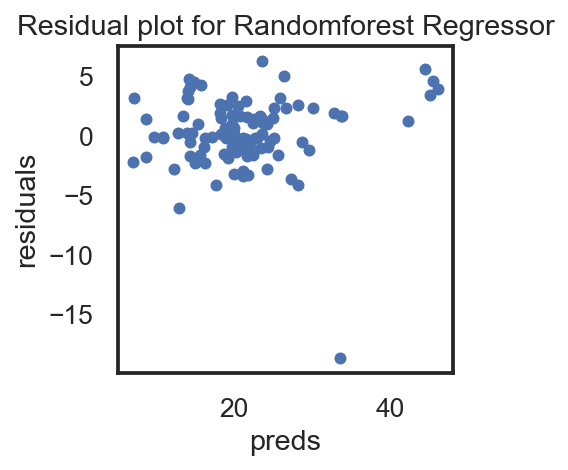

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 3)
preds = pd.DataFrame({"preds":y_pred_rf, "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
ax1 = preds.plot(x = "preds", y = "residuals",kind = "scatter");
plt.title("Residual plot for Randomforest Regressor");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


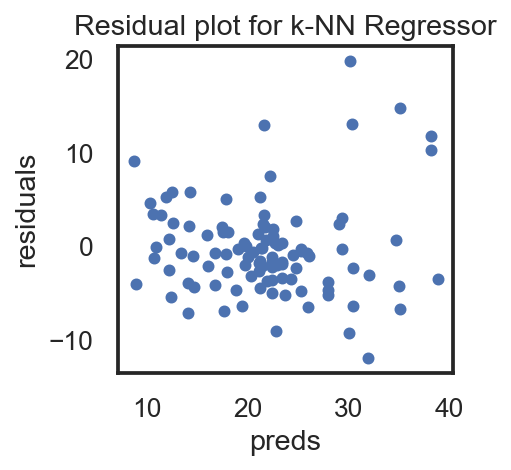

In [21]:
matplotlib.rcParams['figure.figsize'] = (3, 3)
preds = pd.DataFrame({"preds":y_pred_knn, "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
ax1 = preds.plot(x = "preds", y = "residuals",kind = "scatter");
plt.title("Residual plot for k-NN Regressor");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


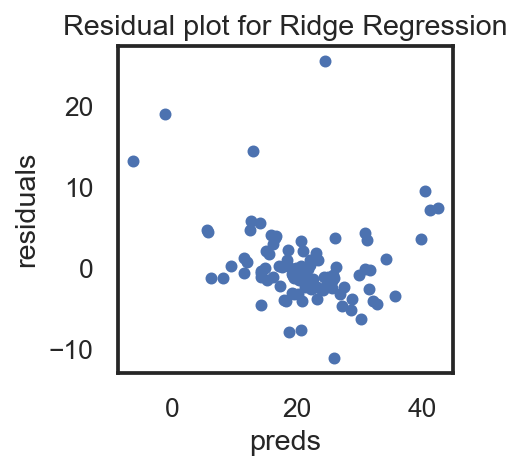

In [22]:
matplotlib.rcParams['figure.figsize'] = (3, 3)
preds = pd.DataFrame({"preds":y_pred_ridge, "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
ax1 = preds.plot(x = "preds", y = "residuals",kind = "scatter");
plt.title("Residual plot for Ridge Regression");

### 11. References and Resources
<a id="11"></a>

- Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
- __[sklearn Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)__
- __[dataquest, understanding regression error metrics](https://www.dataquest.io/blog/understanding-regression-error-metrics/)__
